In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ler.rates import LeR
from ler.utils import get_param_from_json

In [2]:
ler = LeR(verbose=False)

In [11]:
ler = LeR(npool=6,
          verbose=False, 
          event_type='BNS', 
          mtot_max=51,  # for SNR interpolation
          z_max=5,
          ifos=['L1','H1','V1'],
          snr_type="interpolation",
          source_priors=dict(source_frame_masses='binary_masses_uniform',),
          source_priors_params=dict(
              source_frame_masses=dict(
                  m_min=1,
                  m_max=3,
              ),
          ),
          )

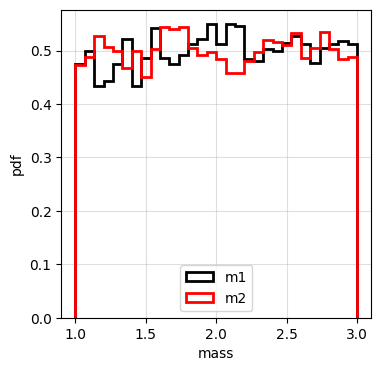

In [12]:
m1,m2 = ler.sample_source_frame_masses(size=10000)
plt.figure(figsize=(4,4))
plt.hist(m1, bins=30, histtype='step', lw=2, color='k', label='m1', density=True)
plt.hist(m2, bins=30, histtype='step', lw=2, color='r', label='m2', density=True)
plt.xlabel('mass')
plt.ylabel('pdf')
plt.legend()
plt.grid(alpha=0.4)
plt.show()


## Un-lensed events

In [47]:
# snr_cut=8.0
ler.selecting_n_unlensed_detectable_events(size=500, batch_size=200000,snr_threshold=8.0, output_jsonfile='n_unlensed_detectable_bns_uniformL1H1V1.json', meta_data_file='n_unlensed_detectable_bns_uniformL1H1V1_meta.json', resume=True);

collected number of detectable events =  0
collected number of detectable events =  10
total number of events =  200000
total unlensed rate (yr^-1): 4.680187172805297
collected number of detectable events =  25
total number of events =  400000
total unlensed rate (yr^-1): 5.850233966006622
collected number of detectable events =  40
total number of events =  600000
total unlensed rate (yr^-1): 6.240249563740396
collected number of detectable events =  53
total number of events =  800000
total unlensed rate (yr^-1): 6.201248003967019
collected number of detectable events =  66
total number of events =  1000000
total unlensed rate (yr^-1): 6.177847068102993
collected number of detectable events =  83
total number of events =  1200000
total unlensed rate (yr^-1): 6.4742589223806615
collected number of detectable events =  90
total number of events =  1400000
total unlensed rate (yr^-1): 6.017383507892525
collected number of detectable events =  103
total number of events =  1600000
total 

In [55]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_unlensed_detectable_bns_uniformL1H1V1_meta.json')
meta_data.keys()

dict_keys(['events_total', 'detectable_events', 'total_rate'])

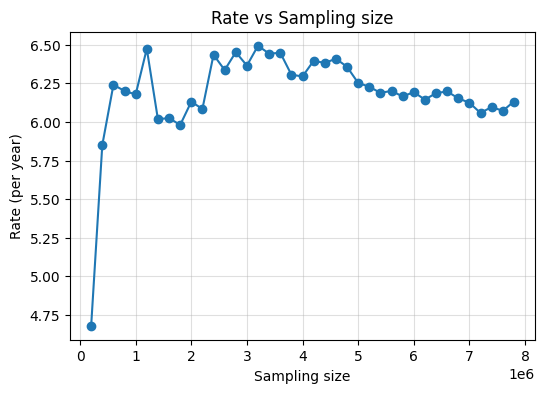

In [56]:
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [57]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 6e6)[0]
# take average 
rate_unlensed = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_unlensed)

Rate (per year) = 6.129521503941839


## Lensed events

In [62]:
# snr_cut=8.0
# time will take long time sample
ler.selecting_n_lensed_detectable_events(size=500, batch_size=200000,snr_threshold=8.0, num_img=1, output_jsonfile='n_lensed_detectable_bnsL1H1V1_uniform.json', meta_data_file='n_lensed_detectable_bns_uniformL1H1V1_meta.json', resume=True);

collected number of detectable events =  0


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.46it/s]


collected number of events =  29
total number of events =  200000
total lensed rate (yr^-1): 0.028103177939605904


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.17s/it]


collected number of events =  51
total number of events =  400000
total lensed rate (yr^-1): 0.02471141508482588


100%|█████████████████████████████████████████████████████| 200000/200000 [00:46<00:00, 4263.53it/s]


collected number of events =  75
total number of events =  600000
total lensed rate (yr^-1): 0.024226877534143022


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.07s/it]


collected number of events =  96
total number of events =  800000
total lensed rate (yr^-1): 0.023257802432777298


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.23it/s]


collected number of events =  120
total number of events =  1000000
total lensed rate (yr^-1): 0.0232578024327773


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.88it/s]


collected number of events =  146
total number of events =  1200000
total lensed rate (yr^-1): 0.02358082746656587


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.76it/s]


collected number of events =  176
total number of events =  1400000
total lensed rate (yr^-1): 0.024365316834338124


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.81it/s]


collected number of events =  198
total number of events =  1600000
total lensed rate (yr^-1): 0.023984608758801592


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.56it/s]


collected number of events =  223
total number of events =  1800000
total lensed rate (yr^-1): 0.024011527511617305


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.94it/s]


collected number of events =  250
total number of events =  2000000
total lensed rate (yr^-1): 0.024226877534143022


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.56it/s]


collected number of events =  276
total number of events =  2200000
total lensed rate (yr^-1): 0.024314975270630815


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.04it/s]


collected number of events =  298
total number of events =  2400000
total lensed rate (yr^-1): 0.024065365017248735


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.23it/s]


collected number of events =  320
total number of events =  2600000
total lensed rate (yr^-1): 0.023854156341310054


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.07it/s]


collected number of events =  349
total number of events =  2800000
total lensed rate (yr^-1): 0.02415765788404547


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.53it/s]


collected number of events =  379
total number of events =  3000000
total lensed rate (yr^-1): 0.02448529756117388


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.74it/s]


collected number of events =  400
total number of events =  3200000
total lensed rate (yr^-1): 0.024226877534143022


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.94s/it]


collected number of events =  427
total number of events =  3400000
total lensed rate (yr^-1): 0.024340886369597813


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.54it/s]


collected number of events =  454
total number of events =  3600000
total lensed rate (yr^-1): 0.024442227556668736


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.10s/it]


collected number of events =  482
total number of events =  3800000
total lensed rate (yr^-1): 0.024583905203067233


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.75s/it]


collected number of events =  508
total number of events =  4000000
total lensed rate (yr^-1): 0.024614507574689307
storing detectable lensed params in ./ler_data/n_lensed_detectable_bnsL1H1V1_uniform.json

 trmming final result to size=500


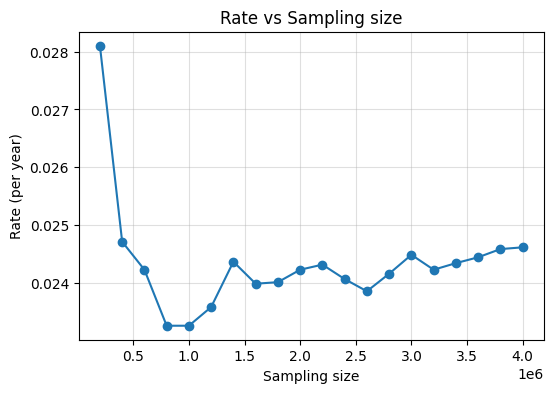

In [63]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_lensed_detectable_bns_uniformL1H1V1_meta.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [64]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 2e6)[0]
# take average 
rate_lensed = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_lensed)

Rate (per year) = 0.024308585631257505


In [65]:
# rate comparison
rate_unlensed/rate_lensed

252.15459249344872

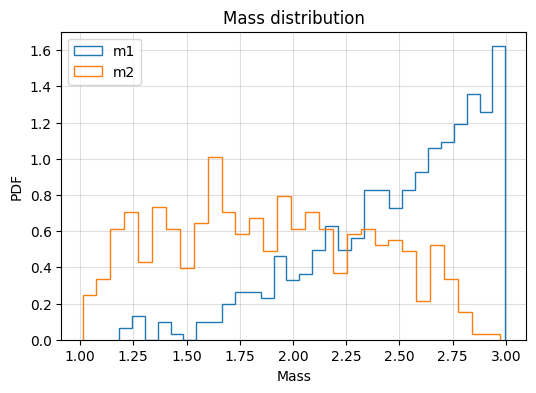

In [44]:
# lensed_params = get_param_from_json('ler_data/n_unlensed_detectable_bnsL1H1V1_uniform.json')
lensed_params = get_param_from_json('ler_data/n_unlensed_detectable_bns_uniformL1H1V1.json')
m1 = lensed_params['mass_1_source']
m2 = lensed_params['mass_2_source']

# plot the mass distribution
plt.figure(figsize=(6,4))
plt.hist(m1, bins=30, histtype='step', label='m1', density=True)
plt.hist(m2, bins=30, histtype='step', label='m2', density=True)
plt.xlabel('Mass')
plt.ylabel('PDF')
plt.legend()
plt.title('Mass distribution')
plt.grid(alpha=0.4)
plt.show()

In [13]:
ler = LeR(npool=8,
          verbose=False, 
          event_type='BNS', 
          mtot_max=51,  # for SNR interpolation
          z_max=5,
          ifos=['L1','H1'],
          snr_type="interpolation",
          source_priors=dict(source_frame_masses='binary_masses_uniform',),
          source_priors_params=dict(
              source_frame_masses=dict(
                  m_min=1,
                  m_max=3,
              ),
          ),
          )

In [16]:
# snr_cut=8.0
# time will take long time sample
ler.selecting_n_unlensed_detectable_events(size=500, batch_size=200000,snr_threshold=8.0, output_jsonfile='n_unlensed_detectable_bns_uniformL1H1.json', meta_data_file='n_unlensed_detectable_bns_uniformL1H1_meta.json', resume=True);

collected number of detectable events =  0
collected number of detectable events =  18
total number of events =  200000
total unlensed rate (yr^-1): 8.424336911049535
collected number of detectable events =  24
total number of events =  400000
total unlensed rate (yr^-1): 5.616224607366357
collected number of detectable events =  34
total number of events =  600000
total unlensed rate (yr^-1): 5.304212129179337
collected number of detectable events =  43
total number of events =  800000
total unlensed rate (yr^-1): 5.031201210765695
collected number of detectable events =  52
total number of events =  1000000
total unlensed rate (yr^-1): 4.86739465971751
collected number of detectable events =  58
total number of events =  1200000
total unlensed rate (yr^-1): 4.524180933711787
collected number of detectable events =  72
total number of events =  1400000
total unlensed rate (yr^-1): 4.81390680631402
collected number of detectable events =  79
total number of events =  1600000
total unle

In [23]:
# snr_cut=8.0
# time will take long time sample
ler.selecting_n_lensed_detectable_events(size=500, batch_size=500000,snr_threshold=8.0, num_img=1, output_jsonfile='n_lensed_detectable_bns_uniformL1H1.json', meta_data_file='n_lensed_detectable_bns_uniformL1H1_meta.json', resume=True);

collected number of detectable events =  444.0


100%|███████████████████████████████████████████████████████████████| 15/15 [00:03<00:00,  4.77it/s]


collected number of events =  493.0
total number of events =  5000000
total lensed rate (yr^-1): 0.019110160998932015


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.48it/s]


collected number of events =  534.0
total number of events =  5500000
total lensed rate (yr^-1): 0.01881767651379254
storing detectable lensed params in ./ler_data/n_lensed_detectable_bns_uniformL1H1.json

 trmming final result to size=500


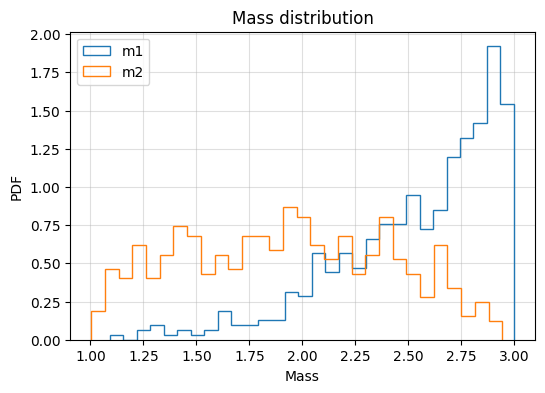

In [41]:
lensed_params = get_param_from_json('ler_data/n_lensed_detectable_bns_uniformL1H1.json')
m1 = lensed_params['mass_1_source']
m2 = lensed_params['mass_2_source']

# plot the mass distribution
plt.figure(figsize=(6,4))
plt.hist(m1, bins=30, histtype='step', label='m1', density=True)
plt.hist(m2, bins=30, histtype='step', label='m2', density=True)
plt.xlabel('Mass')
plt.ylabel('PDF')
plt.legend()
plt.title('Mass distribution')
plt.grid(alpha=0.4)
plt.show()

In [52]:
ler = LeR(npool=8,
          verbose=False, 
          event_type='BNS', 
          mtot_max=51,  # for SNR interpolation
          z_max=5,
          psds={'L1':'custom_psd.txt'},
          snr_type="interpolation",
          source_priors=dict(source_frame_masses='binary_masses_uniform',),
          source_priors_params=dict(
              source_frame_masses=dict(
                  m_min=1,
                  m_max=3,
              ),
          ),
          )

In [53]:
# snr_cut=8.0
ler.selecting_n_unlensed_detectable_events(size=500, batch_size=200000,snr_threshold=8.0, output_jsonfile='n_unlensed_detectable_bns_uniformL1.json', meta_data_file='n_unlensed_detectable_bns_uniforL1_meta.json', resume=False);

collected number of detectable events =  0
collected number of detectable events =  2
total number of events =  200000
total unlensed rate (yr^-1): 0.9360374345610595
collected number of detectable events =  2
total number of events =  400000
total unlensed rate (yr^-1): 0.46801871728052974
collected number of detectable events =  5
total number of events =  600000
total unlensed rate (yr^-1): 0.7800311954675495
collected number of detectable events =  7
total number of events =  800000
total unlensed rate (yr^-1): 0.8190327552409271
collected number of detectable events =  8
total number of events =  1000000
total unlensed rate (yr^-1): 0.7488299476488476
collected number of detectable events =  10
total number of events =  1200000
total unlensed rate (yr^-1): 0.7800311954675495
collected number of detectable events =  13
total number of events =  1400000
total unlensed rate (yr^-1): 0.8691776178066981
collected number of detectable events =  15
total number of events =  1600000
total

In [47]:
# snr_cut=8.0
# time will take long time sample
ler.selecting_n_lensed_detectable_events(size=500, batch_size=200000,snr_threshold=8.0, num_img=1, output_jsonfile='n_lensed_detectable_bns_uniformL1.json', meta_data_file='n_lensed_detectable_bns_uniformL1_meta.json', resume=True);

collected number of detectable events =  36.0


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.45it/s]


collected number of events =  36.0
total number of events =  5900000
total lensed rate (yr^-1): 0.0011826001237005407


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.06it/s]


collected number of events =  37.0
total number of events =  6100000
total lensed rate (yr^-1): 0.0011755993032961205


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  39.0
total number of events =  6300000
total lensed rate (yr^-1): 0.001199807268357559


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  41.0
total number of events =  6500000
total lensed rate (yr^-1): 0.0012225255124921402


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.43it/s]


collected number of events =  43.0
total number of events =  6700000
total lensed rate (yr^-1): 0.0012438874435440597


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.15it/s]


collected number of events =  46.0
total number of events =  6900000
total lensed rate (yr^-1): 0.0012921001351542945


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.76it/s]


collected number of events =  51.0
total number of events =  7100000
total lensed rate (yr^-1): 0.00139219239914512


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


collected number of events =  51.0
total number of events =  7300000
total lensed rate (yr^-1): 0.0013540501416342949


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  2.73it/s]


collected number of events =  53.0
total number of events =  7500000
total lensed rate (yr^-1): 0.001369626143263552


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.51it/s]


collected number of events =  53.0
total number of events =  7700000
total lensed rate (yr^-1): 0.0013340514382437195


100%|█████████████████████████████████████████████████████| 200000/200000 [00:46<00:00, 4290.80it/s]


collected number of events =  55.0
total number of events =  7900000
total lensed rate (yr^-1): 0.0013493450778510037


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.53it/s]


collected number of events =  57.0
total number of events =  8100000
total lensed rate (yr^-1): 0.0013638834759961997


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.43it/s]


collected number of events =  59.0
total number of events =  8300000
total lensed rate (yr^-1): 0.0013777212284476514


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


collected number of events =  61.0
total number of events =  8500000
total lensed rate (yr^-1): 0.0013909077925484464


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.71it/s]


collected number of events =  65.0
total number of events =  8700000
total lensed rate (yr^-1): 0.0014480432549142956


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.42it/s]


collected number of events =  65.0
total number of events =  8900000
total lensed rate (yr^-1): 0.0014155029570510531


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.71s/it]


collected number of events =  67.0
total number of events =  9100000
total lensed rate (yr^-1): 0.0014269897097033692


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


collected number of events =  68.0
total number of events =  9300000
total lensed rate (yr^-1): 0.0014171420837176133


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.42it/s]


collected number of events =  71.0
total number of events =  9500000
total lensed rate (yr^-1): 0.0014485122567782353


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


collected number of events =  72.0
total number of events =  9700000
total lensed rate (yr^-1): 0.0014386269546047814


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  72.0
total number of events =  9900000
total lensed rate (yr^-1): 0.001409563783804685


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.12it/s]


collected number of events =  72.0
total number of events =  10100000
total lensed rate (yr^-1): 0.0013816516296699386


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.72it/s]


collected number of events =  75.0
total number of events =  10300000
total lensed rate (yr^-1): 0.0014112744194646422


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.76it/s]


collected number of events =  76.0
total number of events =  10500000
total lensed rate (yr^-1): 0.001402851575310377


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.09it/s]


collected number of events =  77.0
total number of events =  10700000
total lensed rate (yr^-1): 0.001394743603834776


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.34s/it]


collected number of events =  80.0
total number of events =  10900000
total lensed rate (yr^-1): 0.0014224955616377554


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


collected number of events =  82.0
total number of events =  11100000
total lensed rate (yr^-1): 0.001431786636252056


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.37it/s]


collected number of events =  85.0
total number of events =  11300000
total lensed rate (yr^-1): 0.0014579005949749784


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.16it/s]


collected number of events =  86.0
total number of events =  11500000
total lensed rate (yr^-1): 0.0014493992820426435


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.70it/s]


collected number of events =  87.0
total number of events =  11700000
total lensed rate (yr^-1): 0.0014411886122874821


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.78it/s]


collected number of events =  90.0
total number of events =  11900000
total lensed rate (yr^-1): 0.0014658278844187375


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.40it/s]


collected number of events =  91.0
total number of events =  12100000
total lensed rate (yr^-1): 0.0014576170946162083


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.43s/it]


collected number of events =  91.0
total number of events =  12300000
total lensed rate (yr^-1): 0.001433916003646839


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


collected number of events =  92.0
total number of events =  12500000
total lensed rate (yr^-1): 0.001426478549210341


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


collected number of events =  92.0
total number of events =  12700000
total lensed rate (yr^-1): 0.0014040143200889183


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.07it/s]


collected number of events =  92.0
total number of events =  12900000
total lensed rate (yr^-1): 0.0013822466562115707


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.42it/s]


collected number of events =  95.0
total number of events =  13100000
total lensed rate (yr^-1): 0.001405528772973183


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.41it/s]


collected number of events =  98.0
total number of events =  13300000
total lensed rate (yr^-1): 0.0014281106756968518


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.36s/it]


collected number of events =  99.0
total number of events =  13500000
total lensed rate (yr^-1): 0.001421310148669724


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.34s/it]


collected number of events =  101.0
total number of events =  13700000
total lensed rate (yr^-1): 0.001428855258947997


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.42it/s]


collected number of events =  102.0
total number of events =  13900000
total lensed rate (yr^-1): 0.0014222397171122809


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.13it/s]


collected number of events =  103.0
total number of events =  14100000
total lensed rate (yr^-1): 0.0014158118502222588


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.15it/s]


collected number of events =  104.0
total number of events =  14300000
total lensed rate (yr^-1): 0.001409563783804685


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


collected number of events =  106.0
total number of events =  14500000
total lensed rate (yr^-1): 0.0014168546309622952


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  2.86it/s]


collected number of events =  110.0
total number of events =  14700000
total lensed rate (yr^-1): 0.0014503164782344122


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.12s/it]


collected number of events =  114.0
total number of events =  14900000
total lensed rate (yr^-1): 0.0014828800208817742


100%|█████████████████████████████████████████████████████████████████| 9/9 [00:02<00:00,  3.28it/s]


collected number of events =  117.0
total number of events =  15100000
total lensed rate (yr^-1): 0.001501745521321713


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.43it/s]


collected number of events =  120.0
total number of events =  15300000
total lensed rate (yr^-1): 0.0015201178060638759


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


collected number of events =  121.0
total number of events =  15500000
total lensed rate (yr^-1): 0.0015130075776161576


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.32s/it]


collected number of events =  123.0
total number of events =  15700000
total lensed rate (yr^-1): 0.0015184234072354607


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.19it/s]


collected number of events =  124.0
total number of events =  15900000
total lensed rate (yr^-1): 0.0015115133656521936


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.16it/s]


collected number of events =  127.0
total number of events =  16100000
total lensed rate (yr^-1): 0.0015288514021546155


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.44it/s]


collected number of events =  129.0
total number of events =  16300000
total lensed rate (yr^-1): 0.0015338734733273374


100%|█████████████████████████████████████████████████████████████████| 9/9 [00:02<00:00,  3.20it/s]


collected number of events =  130.0
total number of events =  16500000
total lensed rate (yr^-1): 0.0015270274324550755


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.03it/s]


collected number of events =  132.0
total number of events =  16700000
total lensed rate (yr^-1): 0.0015319510584464089


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


collected number of events =  135.0
total number of events =  16900000
total lensed rate (yr^-1): 0.0015482264933061813


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.44it/s]


collected number of events =  137.0
total number of events =  17100000
total lensed rate (yr^-1): 0.0015527870045275293


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.76it/s]


collected number of events =  141.0
total number of events =  17300000
total lensed rate (yr^-1): 0.001579648431127938


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


collected number of events =  144.0
total number of events =  17500000
total lensed rate (yr^-1): 0.0015948207382475864


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.78it/s]


collected number of events =  144.0
total number of events =  17700000
total lensed rate (yr^-1): 0.0015768001649340544


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.49it/s]


collected number of events =  146.0
total number of events =  17900000
total lensed rate (yr^-1): 0.0015808375955239692


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.08it/s]


collected number of events =  148.0
total number of events =  18100000
total lensed rate (yr^-1): 0.0015847858011284717


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.15it/s]


collected number of events =  150.0
total number of events =  18300000
total lensed rate (yr^-1): 0.0015886477071569195


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.43it/s]


collected number of events =  150.0
total number of events =  18500000
total lensed rate (yr^-1): 0.0015714731373498176


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.44it/s]


collected number of events =  153.0
total number of events =  18700000
total lensed rate (yr^-1): 0.0015857592567802706


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.16it/s]


collected number of events =  154.0
total number of events =  18900000
total lensed rate (yr^-1): 0.0015792334985219156


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.12it/s]


collected number of events =  154.0
total number of events =  19100000
total lensed rate (yr^-1): 0.0015626970220976022


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.41it/s]


collected number of events =  157.0
total number of events =  19300000
total lensed rate (yr^-1): 0.0015766299576623645


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.38it/s]


collected number of events =  158.0
total number of events =  19500000
total lensed rate (yr^-1): 0.0015703986258029119


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


collected number of events =  159.0
total number of events =  19700000
total lensed rate (yr^-1): 0.0015642938184482196


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.43s/it]


collected number of events =  162.0
total number of events =  19900000
total lensed rate (yr^-1): 0.0015777906172989625


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.67s/it]


collected number of events =  163.0
total number of events =  20100000
total lensed rate (yr^-1): 0.0015717337464936567


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.46s/it]


collected number of events =  169.0
total number of events =  20300000
total lensed rate (yr^-1): 0.0016135339126187864


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.34it/s]


collected number of events =  169.0
total number of events =  20500000
total lensed rate (yr^-1): 0.001597792118349335


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.79it/s]


collected number of events =  171.0
total number of events =  20700000
total lensed rate (yr^-1): 0.0016010806022564083


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.46s/it]


collected number of events =  177.0
total number of events =  20900000
total lensed rate (yr^-1): 0.0016413999324567713


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.32s/it]


collected number of events =  178.0
total number of events =  21100000
total lensed rate (yr^-1): 0.0016350271852426381


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.72s/it]


collected number of events =  180.0
total number of events =  21300000
total lensed rate (yr^-1): 0.001637873410758965


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


collected number of events =  181.0
total number of events =  21500000
total lensed rate (yr^-1): 0.001631652031136702


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.42it/s]


collected number of events =  182.0
total number of events =  21700000
total lensed rate (yr^-1): 0.0016255453313231449


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.59it/s]


collected number of events =  184.0
total number of events =  21900000
total lensed rate (yr^-1): 0.0016284001703314396


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


collected number of events =  186.0
total number of events =  22100000
total lensed rate (yr^-1): 0.0016312033380454667


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.26it/s]


collected number of events =  188.0
total number of events =  22300000
total lensed rate (yr^-1): 0.0016339562247242648


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.45it/s]


collected number of events =  189.0
total number of events =  22500000
total lensed rate (yr^-1): 0.001628046170294411


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.82it/s]


collected number of events =  194.0
total number of events =  22700000
total lensed rate (yr^-1): 0.0016563926842726858


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  2.85it/s]


collected number of events =  195.0
total number of events =  22900000
total lensed rate (yr^-1): 0.0016503899106228436


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.08it/s]


collected number of events =  196.0
total number of events =  23100000
total lensed rate (yr^-1): 0.0016444910811054658


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


collected number of events =  197.0
total number of events =  23300000
total lensed rate (yr^-1): 0.0016386935190476136


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.42it/s]


collected number of events =  200.0
total number of events =  23500000
total lensed rate (yr^-1): 0.0016494895342395249


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.74it/s]


collected number of events =  203.0
total number of events =  23700000
total lensed rate (yr^-1): 0.0016601033382045683


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.83it/s]


collected number of events =  208.0
total number of events =  23900000
total lensed rate (yr^-1): 0.0016867583354315476


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.80it/s]


collected number of events =  209.0
total number of events =  24100000
total lensed rate (yr^-1): 0.0016808024579704204


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.77it/s]


collected number of events =  209.0
total number of events =  24300000
total lensed rate (yr^-1): 0.0016669686928842441


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.79it/s]


collected number of events =  210.0
total number of events =  24500000
total lensed rate (yr^-1): 0.0016612716023412359


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.45it/s]


collected number of events =  212.0
total number of events =  24700000
total lensed rate (yr^-1): 0.0016635135343282008


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.77it/s]


collected number of events =  214.0
total number of events =  24900000
total lensed rate (yr^-1): 0.001665719451343488


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.06it/s]


collected number of events =  215.0
total number of events =  25100000
total lensed rate (yr^-1): 0.0016601685003476494


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.78it/s]


collected number of events =  215.0
total number of events =  25300000
total lensed rate (yr^-1): 0.0016470446386848221


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  2.85it/s]


collected number of events =  217.0
total number of events =  25500000
total lensed rate (yr^-1): 0.0016493278195793052


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.11it/s]


collected number of events =  223.0
total number of events =  25700000
total lensed rate (yr^-1): 0.0016817412264945972


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.42it/s]


collected number of events =  225.0
total number of events =  25900000
total lensed rate (yr^-1): 0.0016837212185890904


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.33s/it]


collected number of events =  227.0
total number of events =  26100000
total lensed rate (yr^-1): 0.0016856708659771541


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.39s/it]


collected number of events =  231.0
total number of events =  26300000
total lensed rate (yr^-1): 0.0017023296457451065


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.75it/s]


collected number of events =  232.0
total number of events =  26500000
total lensed rate (yr^-1): 0.0016967956491837526


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.78it/s]


collected number of events =  233.0
total number of events =  26700000
total lensed rate (yr^-1): 0.0016913445589379248


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.10it/s]


collected number of events =  235.0
total number of events =  26900000
total lensed rate (yr^-1): 0.001693179545137133


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.13it/s]


collected number of events =  237.0
total number of events =  27100000
total lensed rate (yr^-1): 0.0016949874466691943


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.79it/s]


collected number of events =  237.0
total number of events =  27300000
total lensed rate (yr^-1): 0.0016825699562174052


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.15it/s]


collected number of events =  237.0
total number of events =  27500000
total lensed rate (yr^-1): 0.0016703330838085514


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.78it/s]


collected number of events =  239.0
total number of events =  27700000
total lensed rate (yr^-1): 0.0016722667814181031


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.08it/s]


collected number of events =  240.0
total number of events =  27900000
total lensed rate (yr^-1): 0.0016672259808442511


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.42it/s]


collected number of events =  241.0
total number of events =  28100000
total lensed rate (yr^-1): 0.0016622569354387098


100%|█████████████████████████████████████████████████████████████████| 9/9 [00:02<00:00,  3.19it/s]


collected number of events =  242.0
total number of events =  28300000
total lensed rate (yr^-1): 0.0016573581238904906


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


collected number of events =  244.0
total number of events =  28500000
total lensed rate (yr^-1): 0.0016593285946191992


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.41it/s]


collected number of events =  249.0
total number of events =  28700000
total lensed rate (yr^-1): 0.001681531012125885


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.42it/s]


collected number of events =  250.0
total number of events =  28900000
total lensed rate (yr^-1): 0.0016766005213939808


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


collected number of events =  254.0
total number of events =  29100000
total lensed rate (yr^-1): 0.0016917187336556226


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.75it/s]


collected number of events =  257.0
total number of events =  29300000
total lensed rate (yr^-1): 0.0017000157068326979


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.32s/it]


collected number of events =  262.0
total number of events =  29500000
total lensed rate (yr^-1): 0.0017213401800530092


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.46it/s]


collected number of events =  264.0
total number of events =  29700000
total lensed rate (yr^-1): 0.001722800180205726


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.17it/s]


collected number of events =  265.0
total number of events =  29900000
total lensed rate (yr^-1): 0.0017177585408823816


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.14it/s]


collected number of events =  267.0
total number of events =  30100000
total lensed rate (yr^-1): 0.0017192229373066276


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.44it/s]


collected number of events =  267.0
total number of events =  30300000
total lensed rate (yr^-1): 0.001707874931119785


100%|█████████████████████████████████████████████████████████████████| 9/9 [00:02<00:00,  3.27it/s]


collected number of events =  267.0
total number of events =  30500000
total lensed rate (yr^-1): 0.0016966757512435898


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.79it/s]


collected number of events =  268.0
total number of events =  30700000
total lensed rate (yr^-1): 0.0016919356818632782


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.67s/it]


collected number of events =  271.0
total number of events =  30900000
total lensed rate (yr^-1): 0.0016998016341107467


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.08it/s]


collected number of events =  272.0
total number of events =  31100000
total lensed rate (yr^-1): 0.0016951024281123862


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.35s/it]


collected number of events =  274.0
total number of events =  31300000
total lensed rate (yr^-1): 0.0016966554490364697


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


collected number of events =  276.0
total number of events =  31500000
total lensed rate (yr^-1): 0.00169818874905993


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.41s/it]


collected number of events =  279.0
total number of events =  31700000
total lensed rate (yr^-1): 0.0017058167399434455


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.08it/s]


collected number of events =  280.0
total number of events =  31900000
total lensed rate (yr^-1): 0.0017011976701091025


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.11it/s]


collected number of events =  282.0
total number of events =  32100000
total lensed rate (yr^-1): 0.0017026740098762198


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.14it/s]


collected number of events =  287.0
total number of events =  32300000
total lensed rate (yr^-1): 0.001722133461869733


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.19it/s]


collected number of events =  287.0
total number of events =  32500000
total lensed rate (yr^-1): 0.001711535717488996


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.41it/s]


collected number of events =  290.0
total number of events =  32700000
total lensed rate (yr^-1): 0.0017188488036456212


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.79it/s]


collected number of events =  293.0
total number of events =  32900000
total lensed rate (yr^-1): 0.0017260729769006458


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.05it/s]


collected number of events =  294.0
total number of events =  33100000
total lensed rate (yr^-1): 0.0017214989716104045


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.08it/s]


collected number of events =  296.0
total number of events =  33300000
total lensed rate (yr^-1): 0.001722800180205726


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.43it/s]


collected number of events =  299.0
total number of events =  33500000
total lensed rate (yr^-1): 0.001729871374975227


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.93it/s]


collected number of events =  302.0
total number of events =  33700000
total lensed rate (yr^-1): 0.0017368586386495412


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.81it/s]


collected number of events =  302.0
total number of events =  33900000
total lensed rate (yr^-1): 0.00172661168502919


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.65s/it]


collected number of events =  304.0
total number of events =  34100000
total lensed rate (yr^-1): 0.0017278523801476783


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.35s/it]


collected number of events =  305.0
total number of events =  34300000
total lensed rate (yr^-1): 0.0017234280228369963


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.46it/s]


collected number of events =  305.0
total number of events =  34500000
total lensed rate (yr^-1): 0.0017134371357480863


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.36it/s]


collected number of events =  307.0
total number of events =  34700000
total lensed rate (yr^-1): 0.0017147323119266645


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.80it/s]


collected number of events =  310.0
total number of events =  34900000
total lensed rate (yr^-1): 0.0017215660826554353


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.03s/it]


collected number of events =  310.0
total number of events =  35100000
total lensed rate (yr^-1): 0.0017117565893069713


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.07it/s]


collected number of events =  311.0
total number of events =  35300000
total lensed rate (yr^-1): 0.0017075487621798255


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  314.0
total number of events =  35500000
total lensed rate (yr^-1): 0.0017143075032610498


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]


collected number of events =  316.0
total number of events =  35700000
total lensed rate (yr^-1): 0.0017155615239863743


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.80it/s]


collected number of events =  319.0
total number of events =  35900000
total lensed rate (yr^-1): 0.0017222003194187461


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  3.00s/it]


collected number of events =  319.0
total number of events =  36100000
total lensed rate (yr^-1): 0.001712659043410886


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.76it/s]


collected number of events =  320.0
total number of events =  36300000
total lensed rate (yr^-1): 0.001708562162187497


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


collected number of events =  321.0
total number of events =  36500000
total lensed rate (yr^-1): 0.001704510178292583


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.08it/s]


collected number of events =  321.0
total number of events =  36700000
total lensed rate (yr^-1): 0.0016952212944871738


100%|█████████████████████████████████████████████████████████████████| 9/9 [00:02<00:00,  3.17it/s]


collected number of events =  325.0
total number of events =  36900000
total lensed rate (yr^-1): 0.001707042861484332


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.33it/s]


collected number of events =  325.0
total number of events =  37100000
total lensed rate (yr^-1): 0.0016978404740908854


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.80it/s]


collected number of events =  331.0
total number of events =  37300000
total lensed rate (yr^-1): 0.0017199134506812525


100%|█████████████████████████████████████████████████████████████████| 9/9 [00:03<00:00,  2.65it/s]


collected number of events =  332.0
total number of events =  37500000
total lensed rate (yr^-1): 0.001715908979484903


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.18it/s]


collected number of events =  332.0
total number of events =  37700000
total lensed rate (yr^-1): 0.0017068060140764951


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.46it/s]


collected number of events =  335.0
total number of events =  37900000
total lensed rate (yr^-1): 0.0017131406805145988


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.79it/s]


collected number of events =  337.0
total number of events =  38100000
total lensed rate (yr^-1): 0.0017143218328621937


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


collected number of events =  338.0
total number of events =  38300000
total lensed rate (yr^-1): 0.0017104302050214813


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.07it/s]


collected number of events =  339.0
total number of events =  38500000
total lensed rate (yr^-1): 0.001706579009677815


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.11it/s]


collected number of events =  343.0
total number of events =  38700000
total lensed rate (yr^-1): 0.0017177920401469885


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.13it/s]


collected number of events =  345.0
total number of events =  38900000
total lensed rate (yr^-1): 0.0017189249869983222


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.50it/s]


collected number of events =  346.0
total number of events =  39100000
total lensed rate (yr^-1): 0.001715089437711199


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.06it/s]


collected number of events =  347.0
total number of events =  39300000
total lensed rate (yr^-1): 0.001711292927093665


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.15it/s]


collected number of events =  348.0
total number of events =  39500000
total lensed rate (yr^-1): 0.0017075348621532701


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.64s/it]


collected number of events =  349.0
total number of events =  39700000
total lensed rate (yr^-1): 0.0017038146618470356


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.08it/s]


collected number of events =  352.0
total number of events =  39900000
total lensed rate (yr^-1): 0.001709846795392149


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.77it/s]


collected number of events =  357.0
total number of events =  40100000
total lensed rate (yr^-1): 0.0017254853425813584


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.73s/it]


collected number of events =  360.0
total number of events =  40300000
total lensed rate (yr^-1): 0.0017313500570305684


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  361.0
total number of events =  40500000
total lensed rate (yr^-1): 0.001727585736261853


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  2.82it/s]


collected number of events =  364.0
total number of events =  40700000
total lensed rate (yr^-1): 0.0017333824908949504


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.08it/s]


collected number of events =  366.0
total number of events =  40900000
total lensed rate (yr^-1): 0.0017343837999992853


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.78it/s]


collected number of events =  366.0
total number of events =  41100000
total lensed rate (yr^-1): 0.0017259439761550066


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.52it/s]


collected number of events =  368.0
total number of events =  41300000
total lensed rate (yr^-1): 0.001726971609213488


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.44it/s]


collected number of events =  372.0
total number of events =  41500000
total lensed rate (yr^-1): 0.00173732982027975


100%|███████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.52it/s]


collected number of events =  374.0
total number of events =  41700000
total lensed rate (yr^-1): 0.0017382929875816768


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  375.0
total number of events =  41900000
total lensed rate (yr^-1): 0.0017346213031605982


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.15it/s]


collected number of events =  378.0
total number of events =  42100000
total lensed rate (yr^-1): 0.0017401918684857125


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.77it/s]


collected number of events =  379.0
total number of events =  42300000
total lensed rate (yr^-1): 0.0017365459263243887


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.22s/it]


collected number of events =  379.0
total number of events =  42500000
total lensed rate (yr^-1): 0.0017283739454946269


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.65s/it]


collected number of events =  380.0
total number of events =  42700000
total lensed rate (yr^-1): 0.0017248175106275127


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.44it/s]


collected number of events =  382.0
total number of events =  42900000
total lensed rate (yr^-1): 0.001725812068632659


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.45it/s]


collected number of events =  388.0
total number of events =  43100000
total lensed rate (yr^-1): 0.001744784869280277


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.67it/s]


collected number of events =  391.0
total number of events =  43300000
total lensed rate (yr^-1): 0.0017501541091639577


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.45it/s]


collected number of events =  393.0
total number of events =  43500000
total lensed rate (yr^-1): 0.0017510184590194405


100%|█████████████████████████████████████████████████████| 200000/200000 [00:46<00:00, 4318.47it/s]


collected number of events =  393.0
total number of events =  43700000
total lensed rate (yr^-1): 0.0017430046445616855


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.78it/s]


collected number of events =  393.0
total number of events =  43900000
total lensed rate (yr^-1): 0.0017350638489144797


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.34s/it]


collected number of events =  393.0
total number of events =  44100000
total lensed rate (yr^-1): 0.0017271950786246183


100%|█████████████████████████████████████████████████████████████████| 9/9 [00:02<00:00,  3.22it/s]


collected number of events =  394.0
total number of events =  44300000
total lensed rate (yr^-1): 0.0017237724150704018


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  395.0
total number of events =  44500000
total lensed rate (yr^-1): 0.0017203805170312796


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  2.87it/s]


collected number of events =  401.0
total number of events =  44700000
total lensed rate (yr^-1): 0.0017386985040163492


100%|███████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  3.15it/s]


collected number of events =  404.0
total number of events =  44900000
total lensed rate (yr^-1): 0.001743903523170384


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.43it/s]


collected number of events =  406.0
total number of events =  45100000
total lensed rate (yr^-1): 0.0017447649275143355


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


collected number of events =  411.0
total number of events =  45300000
total lensed rate (yr^-1): 0.0017584541574450828


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.23it/s]


collected number of events =  413.0
total number of events =  45500000
total lensed rate (yr^-1): 0.0017592440301716164


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.15it/s]


collected number of events =  415.0
total number of events =  45700000
total lensed rate (yr^-1): 0.0017600269893513092


100%|█████████████████████████████████████████████████████████████████| 9/9 [00:03<00:00,  2.85it/s]


collected number of events =  415.0
total number of events =  45900000
total lensed rate (yr^-1): 0.0017523580264347458


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.49it/s]


collected number of events =  417.0
total number of events =  46100000
total lensed rate (yr^-1): 0.0017531640662451437


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.34s/it]


collected number of events =  419.0
total number of events =  46300000
total lensed rate (yr^-1): 0.0017539631424286696


100%|█████████████████████████████████████████████████████| 200000/200000 [00:46<00:00, 4314.67it/s]


collected number of events =  420.0
total number of events =  46500000
total lensed rate (yr^-1): 0.0017505872798864637


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.12it/s]


collected number of events =  420.0
total number of events =  46700000
total lensed rate (yr^-1): 0.0017430901180882346


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  421.0
total number of events =  46900000
total lensed rate (yr^-1): 0.0017397894143921897


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.24it/s]


collected number of events =  424.0
total number of events =  47100000
total lensed rate (yr^-1): 0.0017447466793166267


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.01it/s]


collected number of events =  425.0
total number of events =  47300000
total lensed rate (yr^-1): 0.0017414668840610205


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.16it/s]


collected number of events =  427.0
total number of events =  47500000
total lensed rate (yr^-1): 0.0017422950243501593


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.79it/s]


collected number of events =  428.0
total number of events =  47700000
total lensed rate (yr^-1): 0.001739053012094459


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.52it/s]


collected number of events =  430.0
total number of events =  47900000
total lensed rate (yr^-1): 0.0017398843156044258


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.60s/it]


collected number of events =  432.0
total number of events =  48100000
total lensed rate (yr^-1): 0.0017407087059874904


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.33s/it]


collected number of events =  434.0
total number of events =  48300000
total lensed rate (yr^-1): 0.0017415262691210054


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


collected number of events =  434.0
total number of events =  48500000
total lensed rate (yr^-1): 0.0017343447174957643


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.54it/s]


collected number of events =  434.0
total number of events =  48700000
total lensed rate (yr^-1): 0.001727222151920833


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  437.0
total number of events =  48900000
total lensed rate (yr^-1): 0.0017320483406822907


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.46it/s]


collected number of events =  438.0
total number of events =  49100000
total lensed rate (yr^-1): 0.0017289405067135875


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.97it/s]


collected number of events =  440.0
total number of events =  49300000
total lensed rate (yr^-1): 0.0017297892275899278


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


collected number of events =  442.0
total number of events =  49500000
total lensed rate (yr^-1): 0.001730631090115752


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.77it/s]


collected number of events =  442.0
total number of events =  49700000
total lensed rate (yr^-1): 0.0017236667798939582


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.17it/s]


collected number of events =  444.0
total number of events =  49900000
total lensed rate (yr^-1): 0.0017245264328913028


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.51it/s]


collected number of events =  448.0
total number of events =  50100000
total lensed rate (yr^-1): 0.0017331163489494727


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.14it/s]


collected number of events =  449.0
total number of events =  50300000
total lensed rate (yr^-1): 0.0017300784115833346


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.04it/s]


collected number of events =  450.0
total number of events =  50500000
total lensed rate (yr^-1): 0.0017270645370874233


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.74it/s]


collected number of events =  451.0
total number of events =  50700000
total lensed rate (yr^-1): 0.0017240744406940437


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.72it/s]


collected number of events =  454.0
total number of events =  50900000
total lensed rate (yr^-1): 0.001728723363536492


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.12it/s]


collected number of events =  455.0
total number of events =  51100000
total lensed rate (yr^-1): 0.0017257501805142974


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.42it/s]


collected number of events =  458.0
total number of events =  51300000
total lensed rate (yr^-1): 0.0017303563213469791


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.41it/s]


collected number of events =  459.0
total number of events =  51500000
total lensed rate (yr^-1): 0.001727399889424722


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  460.0
total number of events =  51700000
total lensed rate (yr^-1): 0.0017244663312504125


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.48it/s]


collected number of events =  462.0
total number of events =  51900000
total lensed rate (yr^-1): 0.0017252897758418613


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  3.00s/it]


collected number of events =  463.0
total number of events =  52100000
total lensed rate (yr^-1): 0.0017223868404312045


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.81it/s]


collected number of events =  464.0
total number of events =  52300000
total lensed rate (yr^-1): 0.0017195061072034204


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.40it/s]


collected number of events =  465.0
total number of events =  52500000
total lensed rate (yr^-1): 0.001716647322419277


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


collected number of events =  466.0
total number of events =  52700000
total lensed rate (yr^-1): 0.0017138102361913697


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.13it/s]


collected number of events =  467.0
total number of events =  52900000
total lensed rate (yr^-1): 0.0017109946024113107


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.55it/s]


collected number of events =  469.0
total number of events =  53100000
total lensed rate (yr^-1): 0.0017118501790603505


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.12it/s]


collected number of events =  469.0
total number of events =  53300000
total lensed rate (yr^-1): 0.001705426726230856


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.54it/s]


collected number of events =  470.0
total number of events =  53500000
total lensed rate (yr^-1): 0.00170267400987622


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.38it/s]


collected number of events =  474.0
total number of events =  53700000
total lensed rate (yr^-1): 0.0017107694526903227


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.34s/it]


collected number of events =  475.0
total number of events =  53900000
total lensed rate (yr^-1): 0.0017080173400694522


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.71it/s]


collected number of events =  475.0
total number of events =  54100000
total lensed rate (yr^-1): 0.0017017030430636502


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.78it/s]


collected number of events =  479.0
total number of events =  54300000
total lensed rate (yr^-1): 0.0017097126097759864


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.42it/s]


collected number of events =  480.0
total number of events =  54500000
total lensed rate (yr^-1): 0.0017069946739653066


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.43it/s]


collected number of events =  485.0
total number of events =  54700000
total lensed rate (yr^-1): 0.0017184695581805287


100%|█████████████████████████████████████████████████████████████████| 9/9 [00:02<00:00,  3.18it/s]


collected number of events =  487.0
total number of events =  54900000
total lensed rate (yr^-1): 0.0017192698519675996


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.77it/s]


collected number of events =  488.0
total number of events =  55100000
total lensed rate (yr^-1): 0.0017165468220198613


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.40it/s]


collected number of events =  490.0
total number of events =  55300000
total lensed rate (yr^-1): 0.0017173482809012776


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  492.0
total number of events =  55500000
total lensed rate (yr^-1): 0.0017181439635024671


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.32s/it]


collected number of events =  493.0
total number of events =  55700000
total lensed rate (yr^-1): 0.001715454308701258


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.71it/s]


collected number of events =  495.0
total number of events =  55900000
total lensed rate (yr^-1): 0.0017162510739750691


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.43it/s]


collected number of events =  496.0
total number of events =  56100000
total lensed rate (yr^-1): 0.00171358734501746


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.34s/it]


collected number of events =  496.0
total number of events =  56300000
total lensed rate (yr^-1): 0.0017075000009854264


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.42it/s]


collected number of events =  497.0
total number of events =  56500000
total lensed rate (yr^-1): 0.0017048861075354453


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.79s/it]


collected number of events =  499.0
total number of events =  56700000
total lensed rate (yr^-1): 0.0017057089085767009


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.33s/it]


collected number of events =  502.0
total number of events =  56900000
total lensed rate (yr^-1): 0.0017099321647999714
storing detectable lensed params in ./ler_data/n_lensed_detectable_bns_uniformL1.json

 trmming final result to size=500


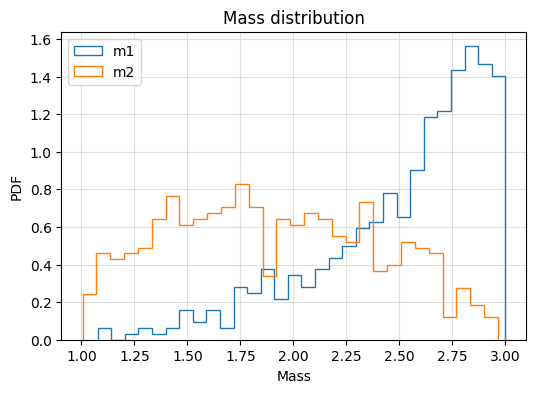

In [58]:
lensed_params = get_param_from_json('ler_data/n_unlensed_detectable_bns_uniformL1.json')
m1 = lensed_params['mass_1_source']
m2 = lensed_params['mass_2_source']

# plot the mass distribution
plt.figure(figsize=(6,4))
plt.hist(m1, bins=30, histtype='step', label='m1', density=True)
plt.hist(m2, bins=30, histtype='step', label='m2', density=True)
plt.xlabel('Mass')
plt.ylabel('PDF')
plt.legend()
plt.title('Mass distribution')
plt.grid(alpha=0.4)
plt.show()

In [49]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_lensed_detectable_bns_uniformL1_meta.json')
meta_data.keys()

dict_keys(['events_total', 'detectable_events', 'total_rate'])

In [50]:
# getting data from json
lensed_params_detectable = get_param_from_json("ler_data/n_lensed_detectable_bns_uniformL1.json")

snr_l = lensed_params_detectable['optimal_snr_net'].flatten()
mu = lensed_params_detectable['magnifications'].flatten()
mu_arr1 = abs(mu[np.where(snr_l>8)[0]])

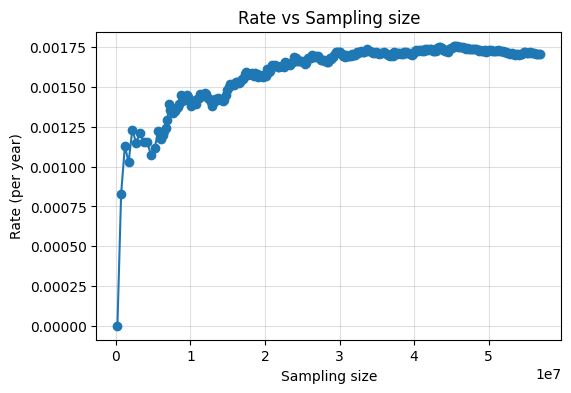

In [51]:
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [54]:
# getting data from json
lensed_params_detectable = get_param_from_json("ler_data/n_lensed_detectable_bns.json")

snr_l = lensed_params_detectable['optimal_snr_net'].flatten()
mu = lensed_params_detectable['magnifications'].flatten()
mu_arr2 = abs(mu[np.where(snr_l>8)[0]])

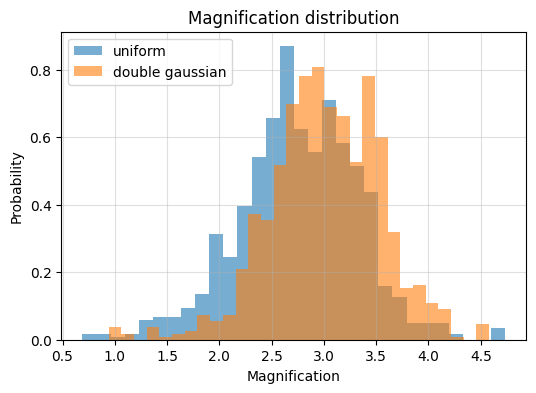

In [55]:
# plot histogram
plt.figure(figsize=(6,4))
mu_arr_1 = mu_arr1[mu_arr1<2000]
mu_arr_2 = mu_arr2[mu_arr2<2000]

plt.hist(np.log10(mu_arr1), bins=30, alpha=0.6, density=True, label='uniform')
plt.hist(np.log10(mu_arr2), bins=30, alpha=0.6, density=True, label='double gaussian')
# plt.hist(mu_arr_1, bins=30, alpha=0.6, density=True, label='uniform')
# plt.hist(mu_arr_2, bins=30, alpha=0.6, density=True, label='double gaussian')
plt.xlabel('Magnification')
plt.ylabel('Probability')
# plt.xscale('log')
plt.title('Magnification distribution')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

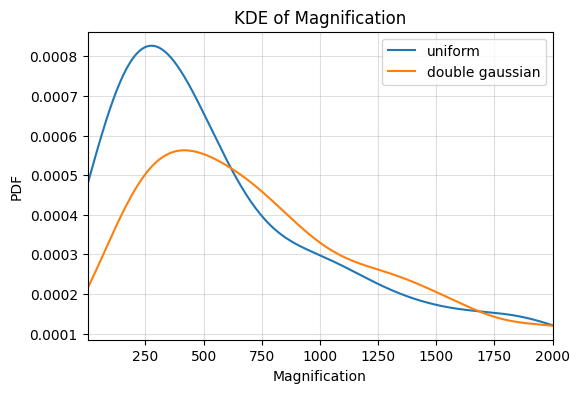

In [56]:
# find kde of magnification
from scipy.stats import gaussian_kde

kde1 = gaussian_kde(mu_arr1, bw_method=0.05)
kde2 = gaussian_kde(mu_arr2, bw_method=0.05)
x = np.linspace(0, 2000, 1000)
plt.figure(figsize=(6,4))
plt.plot(x, kde1(x), label='uniform')
plt.plot(x, kde2(x), label='double gaussian')
plt.xlabel('Magnification')
plt.ylabel('PDF')
#plt.xscale('log')
plt.xlim(1, 2000)
plt.title('KDE of Magnification')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

In [57]:
# find the peak in the kde
from scipy.signal import find_peaks

peaks1, _ = find_peaks(kde1(x))
peaks2, _ = find_peaks(kde2(x))

print('Peak in uniform:', x[peaks1][0])
print('Peak in double gaussian:', x[peaks2][0])

Peak in uniform: 276.2762762762763
Peak in double gaussian: 418.41841841841847


In [72]:
from gwsnr import GWSNR

snr = GWSNR(npool=6,
          mtot_max=51,
          psds={'L1':'custom_psd.txt'},
          snr_type="interpolation",
          )

Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/partialSNR_dict_1.pickle

Chosen GWSNR initialization parameters:

npool:  6
snr type:  interpolation
waveform approximant:  IMRPhenomD
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=20.0): 51
detectors:  ['L1']
psds:  [PowerSpectralDensity(psd_file='custom_psd.txt', asd_file='None')]
min(ratio):  0.1
max(ratio):  1.0
mtot resolution:  500
ratio resolution:  50
interpolator directory:  ./interpolator_pickle


In [ ]:
ans = snr.snr(mass_1=np.array([1,2,3]), mass_2=np.array([1,2,3]))
print(ans.keys())
print(ans['optimal_snr_net']-ans['L1'])

dict_keys(['L1', 'optimal_snr_net'])
[0. 0. 0.]


In [ ]:
ans['optimal_snr_net']

array([15.73340345, 27.54959692, 38.00226742])

In [ ]:
import gwsnr
gwsnr.__version__

'0.2.4'

In [1]:
from ler.rates import LeR

ler = LeR(npool=8,
          verbose=False, 
          event_type='BNS', 
          mtot_max=51,  # for SNR interpolation
          z_max=1,
          psds={'L1':'custom_psd.txt'},
          snr_type="interpolation",
          source_priors=dict(source_frame_masses='binary_masses_uniform',),
          source_priors_params=dict(
              source_frame_masses=dict(
                  m_min=1,
                  m_max=3,
              ),
          ),
          )

In [10]:
# snr_cut=8.0
# time will take long time sample
ler.selecting_n_lensed_detectable_events(size=500, batch_size=200000,snr_threshold=8.0, num_img=1, output_jsonfile='n_lensed_detectable_bns_uniformL1_zs1.json', meta_data_file='n_lensed_detectable_bns_uniformL1_zs1_meta.json', resume=True);

collected number of detectable events =  142.0


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.46it/s]


collected number of events =  198.0
total number of events =  800000
total lensed rate (yr^-1): 0.00032347669150391197


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  246.0
total number of events =  1000000
total lensed rate (yr^-1): 0.0003215162267069185


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.42it/s]


collected number of events =  296.0
total number of events =  1200000
total lensed rate (yr^-1): 0.00032238754439447117


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


collected number of events =  350.0
total number of events =  1400000
total lensed rate (yr^-1): 0.0003267441328322343


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.34s/it]


collected number of events =  409.0
total number of events =  1600000
total lensed rate (yr^-1): 0.0003340958758209596


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.47it/s]


collected number of events =  460.0
total number of events =  1800000
total lensed rate (yr^-1): 0.0003340051135618395


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  2.88it/s]


collected number of events =  515.0
total number of events =  2000000
total lensed rate (yr^-1): 0.0003365464568172013
storing detectable lensed params in ./ler_data/n_lensed_detectable_bns_uniformL1_zs1.json

 trmming final result to size=500


In [1]:
from ler.utils import get_param_from_json
import numpy as np
# getting data from json
lensed_params_detectable = get_param_from_json("ler_data/n_lensed_detectable_bns_uniformL1_zs1.json")

snr_l = lensed_params_detectable['optimal_snr_net'].flatten()
mu = lensed_params_detectable['magnifications'].flatten()
mu_arr2 = abs(mu[np.where(snr_l>8)[0]])

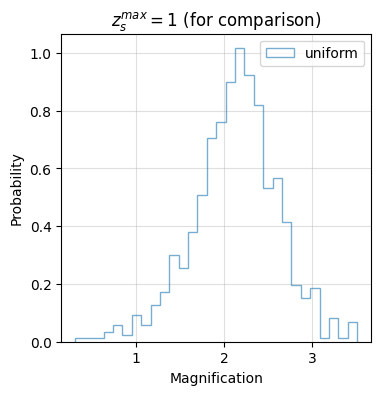

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.hist(np.log10(mu_arr2), bins=30, alpha=0.6, density=True, label='uniform', histtype='step')
plt.xlabel('Magnification')
plt.ylabel('Probability')
plt.title(r'$z_s^{max}=1$ (for comparison)')
plt.grid(alpha=0.4)
plt.legend()
plt.show()